MODELOS DE RNN (LSTM) PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO

Importamos la data de Demanda de gas en sector eléctrico como un CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

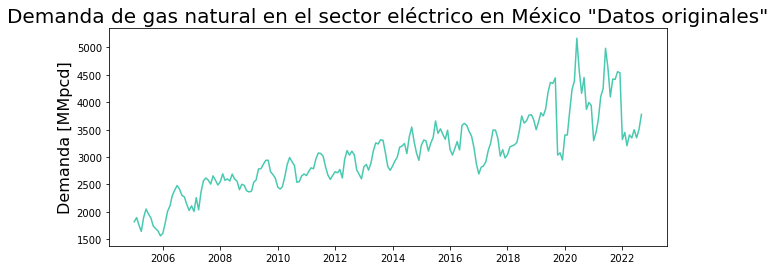

In [3]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual 

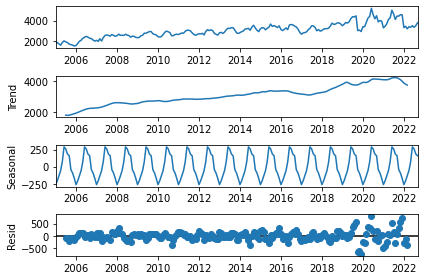

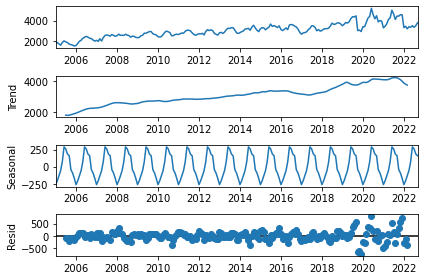

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

csv_demanda_electrico_original_seasonal_decomposition = seasonal_decompose(csv_demanda_electrico_original)
csv_demanda_electrico_original_seasonal_decomposition.plot()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [5]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
csv_demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
csv_demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

csv_demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Para la aplicación de RNN(LSTM) combiene escalar la data. Por lo que se define y entrena el MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(csv_demanda_electrico_original_train_data)

MinMaxScaler()

Se aplica la escalación de data

In [7]:
csv_demanda_electrico_scaled_train = MinMax_scaler.transform(csv_demanda_electrico_original_train_data)
csv_demanda_electrico_scaled_test = MinMax_scaler.transform(csv_demanda_electrico_original_test_data)
csv_demanda_electrico_scaled_train

array([[0.07168816],
       [0.09268731],
       [0.0567961 ],
       [0.02265413],
       [0.09274552],
       [0.13604118],
       [0.11118319],
       [0.09111549],
       [0.04937779],
       [0.03740758],
       [0.02438673],
       [0.        ],
       [0.0137139 ],
       [0.06801505],
       [0.1236108 ],
       [0.15172886],
       [0.20456354],
       [0.23227963],
       [0.2549393 ],
       [0.23621611],
       [0.20444988],
       [0.1976359 ],
       [0.15896421],
       [0.12890563],
       [0.15187856],
       [0.12359139],
       [0.19350815],
       [0.13185522],
       [0.2219949 ],
       [0.27894624],
       [0.2931425 ],
       [0.28230888],
       [0.26220515],
       [0.30390127],
       [0.28192632],
       [0.25737049],
       [0.27370963],
       [0.31419986],
       [0.28129981],
       [0.28810548],
       [0.27775144],
       [0.31287199],
       [0.28763698],
       [0.27746314],
       [0.23393184],
       [0.26135964],
       [0.25557967],
       [0.228

Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc

In [8]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [9]:
n_input = 24

# Assuming you have a column in your DataFrame named 'demand_data' that contains your time series data
data = csv_demanda_electrico_scaled_train
targets = data  # You can adjust this if your target data is different

demanda_electrico_scaled_train_generator  = TimeseriesGenerator(data, targets, length=n_input, batch_size=1)

In [10]:
X,y = demanda_electrico_scaled_train_generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07168816 0.09268731 0.0567961  0.02265413 0.09274552 0.13604118
 0.11118319 0.09111549 0.04937779 0.03740758 0.02438673 0.
 0.0137139  0.06801505 0.1236108  0.15172886 0.20456354 0.23227963
 0.2549393  0.23621611 0.20444988 0.1976359  0.15896421 0.12890563]
Predict this y: 
 [[0.15187856]]


In [11]:
X,y = demanda_electrico_scaled_train_generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.09268731 0.0567961  0.02265413 0.09274552 0.13604118 0.11118319
 0.09111549 0.04937779 0.03740758 0.02438673 0.         0.0137139
 0.06801505 0.1236108  0.15172886 0.20456354 0.23227963 0.2549393
 0.23621611 0.20444988 0.1976359  0.15896421 0.12890563 0.15187856]
Predict this y: 
 [[0.12359139]]


Se importan las librerias necesarias y se define la RNN(LSTM)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
n_input = 24
n_features = 1
# define model
model_LSTM_and_Dense = Sequential()
model_LSTM_and_Dense.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_LSTM_and_Dense.add(Dense(1))
model_LSTM_and_Dense.compile(optimizer='adam', loss='mse')

In [14]:
model_LSTM_and_Dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo RNN(LSTM) + Dense Layers con el demanda_electrico_scaled_train_generator

In [15]:
model_LSTM_and_Dense.fit(demanda_electrico_scaled_train_generator, epochs=25)

Epoch 1/25
177/177 [==============================] - 4s 8ms/step - loss: 0.0185
Epoch 2/25
177/177 [==============================] - 1s 8ms/step - loss: 0.0097
Epoch 3/25
177/177 [==============================] - 1s 8ms/step - loss: 0.0087
Epoch 4/25
177/177 [==============================] - 1s 8ms/step - loss: 0.0096
Epoch 5/25
177/177 [==============================] - 2s 8ms/step - loss: 0.0091
Epoch 6/25
177/177 [==============================] - 1s 8ms/step - loss: 0.0085
Epoch 7/25
177/177 [==============================] - 2s 9ms/step - loss: 0.0083
Epoch 8/25
177/177 [==============================] - 2s 9ms/step - loss: 0.0075
Epoch 9/25
177/177 [==============================] - 2s 9ms/step - loss: 0.0075
Epoch 10/25
177/177 [==============================] - 2s 11ms/step - loss: 0.0070
Epoch 11/25
177/177 [==============================] - 2s 9ms/step - loss: 0.0072
Epoch 12/25
177/177 [==============================] - 2s 9ms/step - loss: 0.0072
Epoch 13/25
177/177 [===

Se grafica la perdida por epoch 

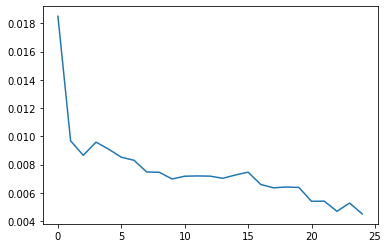

In [16]:
loss_per_epoch = model_LSTM_and_Dense.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se toman los ultimos 12 elementos de los datos de train y se almacenan en un batch

In [17]:
demanda_electrico_scaled_train_batch = csv_demanda_electrico_scaled_train[-n_input:]
demanda_electrico_scaled_train_batch

array([[0.40929895],
       [0.42016029],
       [0.38425244],
       [0.51049126],
       [0.51049126],
       [0.62604337],
       [0.74135154],
       [0.7836714 ],
       [1.        ],
       [0.83747356],
       [0.72153611],
       [0.80133008],
       [0.64003449],
       [0.67506632],
       [0.65981388],
       [0.48164966],
       [0.52483443],
       [0.58778751],
       [0.7051942 ],
       [0.74375778],
       [0.94934147],
       [0.85129557],
       [0.70352813],
       [0.79378425]])

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron  1, input_shape=(n_input, n_features)

In [18]:
demanda_electrico_scaled_train_batch_reshaped = demanda_electrico_scaled_train_batch.reshape(1,n_input, n_features)
demanda_electrico_scaled_train_batch_reshaped

array([[[0.40929895],
        [0.42016029],
        [0.38425244],
        [0.51049126],
        [0.51049126],
        [0.62604337],
        [0.74135154],
        [0.7836714 ],
        [1.        ],
        [0.83747356],
        [0.72153611],
        [0.80133008],
        [0.64003449],
        [0.67506632],
        [0.65981388],
        [0.48164966],
        [0.52483443],
        [0.58778751],
        [0.7051942 ],
        [0.74375778],
        [0.94934147],
        [0.85129557],
        [0.70352813],
        [0.79378425]]])

Intentamos predecir el sigueinte valor dado el primet batch de 12. Esto equivaldria a predecir el primer valor de los datos de test, dados los 12 anteriores

In [19]:
model_LSTM_and_Dense.predict(demanda_electrico_scaled_train_batch_reshaped)

1/1 [==============================] - 0s 308ms/step


array([[0.58114123]], dtype=float32)

Y se compara el valor de forecast del modelo model_LSTM_and_Dense con los datos de test de la demanda de gasd natural en sector eléctrico escalado 

In [20]:
csv_demanda_electrico_scaled_test[0]

array([0.791877])

Ahora ser hará una función que irá formando batch de 12 para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo 

In [21]:
n_input = 24
n_features = 1

In [22]:
test_predictions_model_LSTM_and_Dense_con_Normalizacion = []

first_eval_batch = demanda_electrico_scaled_train_batch = csv_demanda_electrico_scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(csv_demanda_electrico_scaled_test)):
    
    # get the prediction value for the first batch
    current_pred = model_LSTM_and_Dense.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions_model_LSTM_and_Dense_con_Normalizacion.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 24ms/step


In [23]:
test_predictions_model_LSTM_and_Dense_con_Normalizacion

[array([0.58114123], dtype=float32),
 array([0.48020086], dtype=float32),
 array([0.42186147], dtype=float32),
 array([0.40939796], dtype=float32),
 array([0.4229526], dtype=float32),
 array([0.4512689], dtype=float32),
 array([0.48746198], dtype=float32),
 array([0.52188027], dtype=float32),
 array([0.5478287], dtype=float32),
 array([0.5528438], dtype=float32),
 array([0.53414154], dtype=float32),
 array([0.4946936], dtype=float32)]

In [24]:
csv_demanda_electrico_scaled_test

array([[0.791877  ],
       [0.83064572],
       [0.82552553],
       [0.48783713],
       [0.52361191],
       [0.45629267],
       [0.51076016],
       [0.49595403],
       [0.53716779],
       [0.49621461],
       [0.5393079 ],
       [0.61469691]])

In [26]:
predictions_model_LSTM_and_Dense_con_Normalizacion_rescaled = MinMax_scaler.inverse_transform(test_predictions_model_LSTM_and_Dense_con_Normalizacion)
predictions_model_LSTM_and_Dense_con_Normalizacion_rescaled

array([[3657.32495999],
       [3293.20374917],
       [3082.7566612 ],
       [3037.79716608],
       [3086.69265694],
       [3188.83783127],
       [3319.39674083],
       [3443.55347574],
       [3537.15689857],
       [3555.24794423],
       [3487.78343773],
       [3345.48330193]])

In [28]:
csv_demanda_electrico_original_test_data

,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


In [31]:
csv_demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

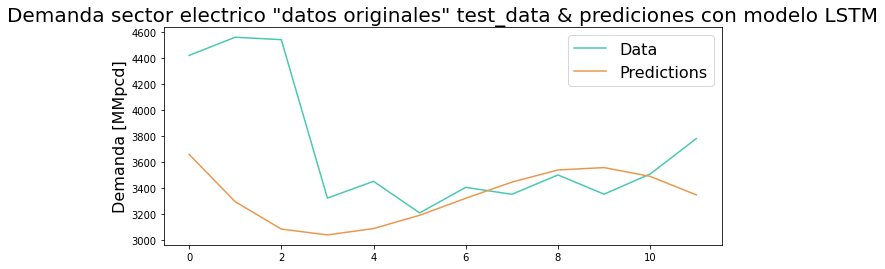

In [27]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, color='#48C9B0')
plt.plot(predictions_model_LSTM_and_Dense_con_Normalizacion_rescaled, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo LSTM', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [29]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_LSTM_and_Dense_con_Normalizacion = mean_absolute_percentage_error(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, predictions_model_LSTM_and_Dense_con_Normalizacion_rescaled)
RMSE_predictions_model_LSTM_and_Dense_con_Normalizacion = np.sqrt(mean_squared_error(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, predictions_model_LSTM_and_Dense_con_Normalizacion_rescaled))

print('MAPE:', MAPE_predictions_model_LSTM_and_Dense_con_Normalizacion)
print('RMSE:', RMSE_predictions_model_LSTM_and_Dense_con_Normalizacion)

MAPE: 0.10090384307755852
RMSE: 629.5031652043606
